<a href="https://colab.research.google.com/github/BirenderPanwar/TSAI_EIP4_Phase1/blob/master/session1/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


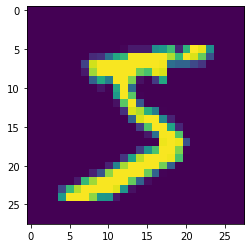

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
model = Sequential(name="model_mnist")

model.add(Convolution2D(32,(3,3), activation='relu', input_shape=(28,28,1), name="blk1_conv_layer1")) # 26X26X32
model.add(Convolution2D(64,(3,3), activation='relu', name="blk1_conv_layer2")) # 24X24X64
model.add(MaxPooling2D((2,2), name="blk1_maxpool")) # 12X12X64
model.add(Convolution2D(32,(1,1), activation='relu', name="blk1_conv_layer3")) # 12X12X32

model.add(Convolution2D(32,(3,3), activation='relu', name="blk2_conv_layer1")) # 10X10X32
model.add(Convolution2D(64,(3,3), activation='relu', name="blk2_conv_layer2")) # 8X8X64
model.add(Convolution2D(128,(3,3), activation='relu', name="blk2_conv_layer3")) # 6X6X128
model.add(MaxPooling2D((2,2), name="blk2_maxpool"))  # 3X3X128
model.add(Convolution2D(10,(1,1), activation='relu', name="blk2_conv_layer4")) # 3X3X10

model.add(Convolution2D(10,(3,3), name="blk3_conv_layer1")) # 1X1X10

model.add(Flatten(name='flatten'))
model.add(Activation('softmax', name="output"))

In [11]:
model.summary()

Model: "model_mnist"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
blk1_conv_layer1 (Conv2D)    (None, 26, 26, 32)        320       
_________________________________________________________________
blk1_conv_layer2 (Conv2D)    (None, 24, 24, 64)        18496     
_________________________________________________________________
blk1_maxpool (MaxPooling2D)  (None, 12, 12, 64)        0         
_________________________________________________________________
blk1_conv_layer3 (Conv2D)    (None, 12, 12, 32)        2080      
_________________________________________________________________
blk2_conv_layer1 (Conv2D)    (None, 10, 10, 32)        9248      
_________________________________________________________________
blk2_conv_layer2 (Conv2D)    (None, 8, 8, 64)          18496     
_________________________________________________________________
blk2_conv_layer3 (Conv2D)    (None, 6, 6, 128)         

In [12]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=28, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Epoch 1/10





60000/60000 [==============================] - 21s 343us/step - loss: 0.1640 - acc: 0.9489
Epoch 2/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.0593 - acc: 0.9815
Epoch 3/10
60000/60000 [==============================] - 18s 292us/step - loss: 0.0427 - acc: 0.9865
Epoch 4/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.0345 - acc: 0.9893
Epoch 5/10
60000/60000 [==============================] - 18s 299us/step - loss: 0.0286 - acc: 0.9913
Epoch 6/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.0229 - acc: 0.9929
Epoch 7/10
60000/60000 [==============================] - 18s 293us/step - loss: 0.0209 - acc: 0.9935
Epoch 8/10
60000/60000 [==============================] - 17s 291us/step - loss: 0.0166 - acc: 0.9944
Epoch 9/10
60000/60000 [==============================] - 18s 292us/step - loss: 0.0153 - acc: 0.9950
Epoch 10/10
60000/60000 [==============================] - 17s 289us/step -

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [15]:
print(score)

[0.028248861337271773, 0.9923]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[3.10216479e-13 1.47408274e-09 9.25730959e-09 1.37590730e-10
  1.43699438e-13 6.70210415e-12 3.42175256e-21 1.00000000e+00
  1.26170741e-11 1.62857880e-10]
 [6.28527300e-11 5.84791024e-08 1.00000000e+00 5.26080048e-13
  4.70750067e-13 2.64724928e-17 2.76848905e-10 1.82763367e-14
  1.23521815e-09 5.79453386e-17]
 [1.31480842e-11 9.99999642e-01 1.11608225e-08 2.29402998e-12
  3.05456299e-10 9.91319240e-08 8.94756769e-10 2.04428432e-07
  1.29455136e-09 6.35785591e-11]
 [1.00000000e+00 1.02374943e-15 6.03040702e-14 1.01613826e-13
  2.49116699e-13 1.34260279e-13 1.95589998e-08 8.39400016e-16
  4.44546574e-14 1.31951680e-11]
 [1.30606137e-10 3.60559915e-11 1.41300600e-13 5.68048776e-16
  1.00000000e+00 7.22496827e-15 1.55586167e-12 3.67020562e-14
  1.38651354e-10 5.86909077e-10]
 [3.38430976e-12 9.99999881e-01 2.34692643e-09 3.34459125e-14
  4.69688011e-10 2.42755649e-10 6.25309136e-12 1.74857291e-07
  1.53463103e-10 1.26237874e-11]
 [3.11007332e-15 1.02212084e-06 2.35140379e-10 1.42858377e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

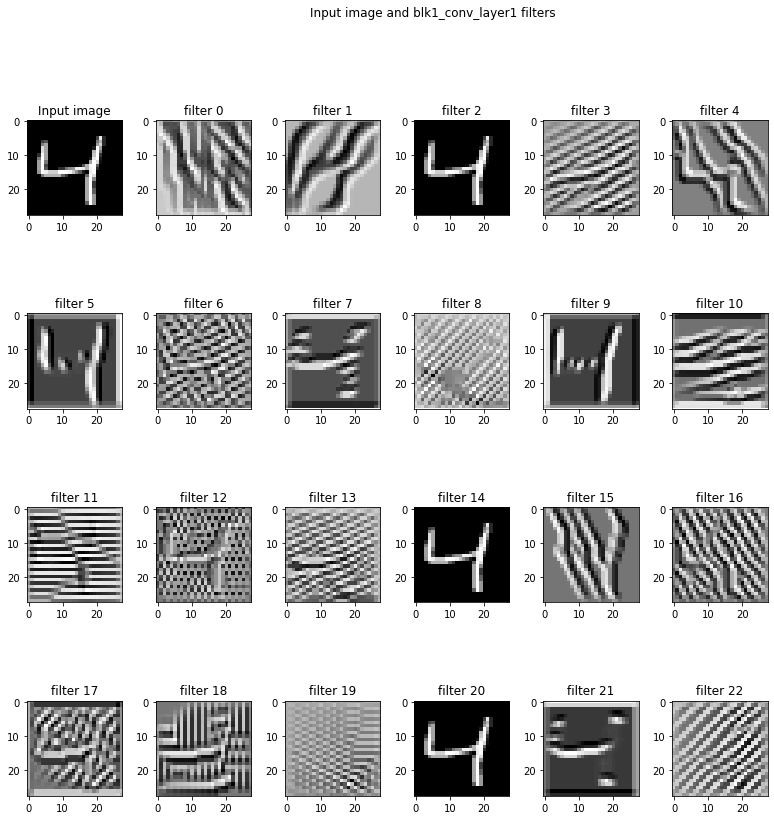

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'blk1_conv_layer1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()